In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
projects = pd.read_csv("C:/Users/samaher/Desktop/Data/Projects.csv", engine='python')


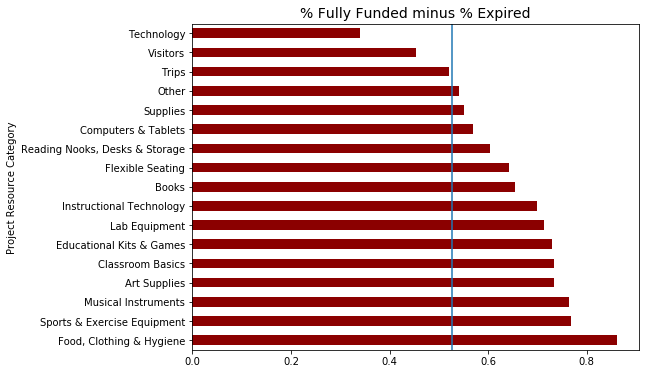

In [5]:
avg_success = (len(projects[projects['Project Current Status']=='Fully Funded']) - len(projects[projects['Project Current Status']=='Expired'])) / len(projects)

_ = pd.crosstab(projects['Project Resource Category'], projects['Project Current Status'], normalize='index')
_['success'] = _['Fully Funded']-_['Expired']
_['success'].sort_values(ascending=False).plot(kind='barh', color='darkred', figsize=(8,6))
plt.axvline(x=avg_success)
plt.title('% Fully Funded minus % Expired', fontsize=14)
plt.show()

In [6]:
def create_topline(df_input, str_item_column, str_count_column):
    df_temp = df_input.groupby(str_item_column).size().reset_index(name=str_count_column)
    df_output = pd.DataFrame(columns=[str_item_column, str_count_column, 'Percent'])
    int_rows = df_temp.shape[0]
    int_columns = df_temp.shape[1]
    int_total = df_temp[str_count_column].sum()
    flt_total = float(int_total)
    for i in range(int_rows):
        str_item = df_temp.iloc[i][0]
        int_count = df_temp.iloc[i][1]
        flt_percent = round(int_count / flt_total * 100, 1)
        df_output.loc[i] = [str_item, int_count, flt_percent]
    
    df_output.loc[int_rows] = ['Total', int_total, 100.0]
    return df_output  

In [7]:
def project_cost_summary1 (row):
   if row['Project Cost'] <= 250 :
      return '0000.00 to 0250.00'
   if row['Project Cost'] <= 500 :
      return '0250.01 to 0500.00'
   if row['Project Cost'] <= 750 :
      return '0500.01 to 0750.00'
   if row['Project Cost'] <= 1000 :
      return '0750.01 to 1000.00'
   if row['Project Cost'] > 1000 :
      return '1000.01+'
   return 'Other'

projects['Project Cost Summary 1'] = projects.apply(project_cost_summary1, axis=1)
create_topline(projects, 'Project Cost Summary 1', 'Count')

,Project Cost Summary 1,Count,Percent
0,0000.00 to 0250.00,155965,14.1
1,0250.01 to 0500.00,370138,33.3
2,0500.01 to 0750.00,246570,22.2
3,0750.01 to 1000.00,135288,12.2
4,1000.01+,202056,18.2
5,Total,1110017,100.0


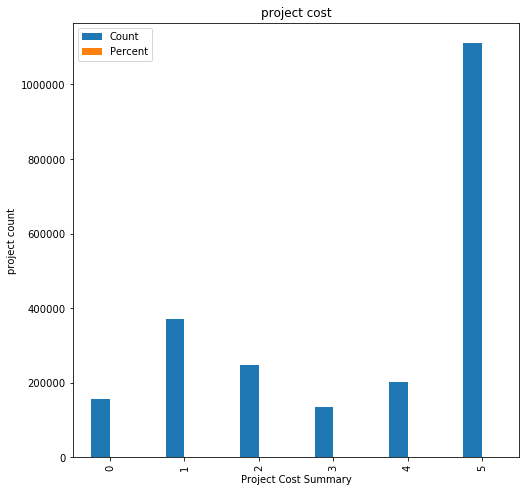

In [8]:
create_topline(projects, 'Project Cost Summary 1', 'Count').plot.bar(figsize=(8,8))
plt.xlabel("Project Cost Summary")
plt.ylabel("project count")
plt.title("project cost")
plt.show()

In [9]:
donations= pd.read_csv('C:/Users/samaher/Desktop/Data/Donations.csv',low_memory=False, parse_dates=['Donation Received Date'])


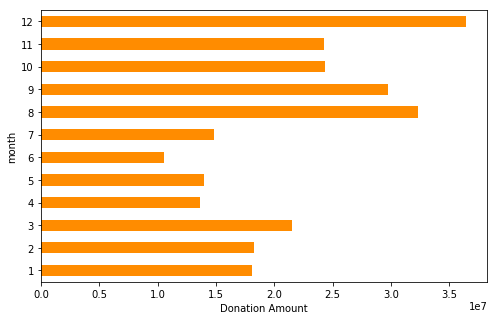

In [10]:
ts = donations.loc[:,['Donation Received Date', 'Donation Amount']]
ts.set_index('Donation Received Date', inplace=True)
ts = ts[(ts.index>='2013-01-01') & (ts.index<'2018-01-01') ]
ts['month'] = ts.index.month
ts.groupby('month').sum()['Donation Amount'].plot(kind='barh', color='darkorange', figsize=(8,5))
plt.xlabel('Donation Amount')
plt.show()
